In [1]:
import joblib
import pandas as pd
import numpy as np
import xgboost as xgb
import random
import matplotlib.pyplot as plt
import shap
import seaborn as sns

In [2]:
random.seed(10)

In [3]:
model_list = joblib.load("XGBoost.model.joblib.imbalanced.v2.gz")


In [4]:
# print the JS visualization code to the notebook
shap.initjs()

In [5]:
model_list.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.9936412353162566, colsample_bynode=1,
              colsample_bytree=0.7068886675204529, early_stopping_rounds=None,
              enable_categorical=False, eta=0.09992988364948747,
              eval_metric=None, gamma=0.17222525537178793, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.02428764960457413,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=1, max_depth=48,
              max_leaves=0, min_child_weight=1.0498982344311603, missing=nan,
              monotone_constraints='()', n_estimators=931, n_jobs=1,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, ...)

In [6]:
model = model_list.best_estimator_

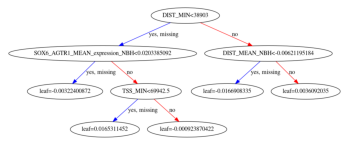

In [7]:
from xgboost import plot_tree

plot_tree(model)
plt.show()

In [8]:
xgb_fea_imp=pd.DataFrame(list(model.get_booster().get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
print('',xgb_fea_imp)

                               feature  importance
2                       DIST_MEAN_NBH       318.0
14      PsychENCODE_eQTLs_MEAN_EFFECT       304.0
41         SOX6_AGTR1_MEAN_expression       270.0
7                         TSS_MIN_NBH       265.0
8                      VEP_IMPACT_MAX       198.0
13      eQTLGen_cis_eQTLs_MEAN_EFFECT       162.0
46      CALB1_GEM_MEAN_expression_NBH       151.0
35        CALB1_CALCR_MEAN_expression       126.0
20       PsychENCODE_eQTLs_MAX_EFFECT        96.0
3                        DIST_MIN_NBH        94.0
10                 VEP_IMPACT_MAX_NBH        90.0
5                             TSS_MIN        82.0
43         SOX6_GFRA2_MEAN_expression        78.0
0                           DIST_MEAN        62.0
39         CALB1_RBP4_MEAN_expression        52.0
12       Brain_Cerebellum_MEAN_EFFECT        49.0
42           SOX6_DDT_MEAN_expression        49.0
36  CALB1_CRYM_CCDC68_MEAN_expression        45.0
4                            TSS_MEAN        41.0

In [9]:
X_data_df = pd.read_csv("testing_data_v10_imbalanced_v2.csv", sep=",")
best_genes = pd.read_csv("../manuscript_data/best_genes.txt")

In [10]:
X_best_genes = X_data_df[X_data_df["symbol"].isin(best_genes["gene"])]

In [11]:
X_best_genes.reset_index(drop=True, inplace=True)
X_best_genes

symbol  locus  DIST_MEAN  DIST_MIN  DIST_MEAN_NBH  DIST_MIN_NBH  TSS_MEAN  \
0    ASXL3     73          0         0            0.0           0.0    146170   
1     BIN3     39       5771         0            0.0           0.0     44890   
2    BRIP1     71          0         0            0.0           0.0     23553   
3   CAB39L     53          0         0            0.0           0.0     90467   
4   CAMK2D     24        520         0            0.0           0.0    307532   
..     ...    ...        ...       ...            ...           ...       ...   
73   UBAP2     42          0         0            0.0           0.0      4866   
74   VAMP4      3       6511      3134            0.0           0.0      6685   
75  VPS13C     59     148619    147203            0.0           0.0    356702   
76   ZBTB4     66       7065         0            0.0           0.0     26203   
77  ZCWPW2     13     126985    126077            0.0           0.0    316387   

    TSS_MIN  TSS_MEAN_NBH  TSS_MIN_NBH  ...  SOX6_PART1_MEAN_expression  \
0    146136      0.000000     0.000000  ...                    5.549887   
1       680     -0.833720     0.000000  ...                    0.544974   
2     23553      0.000000     0.000000  ...                    0.115268   
3     90467      0.000000     0.000000  ...                    3.058957   
4    301238      0.000000     0.000000  ...                   14.187831   
..      ...           ...          ...  ...                         ...   
73     2994      0.000000     0.000000  ...                    3.097506   
74     3308      0.000000     0.000000  ...                    0.721844   
75   355286      0.000000     0.000000  ...                    6.359033   
76    15649     -0.311835    -1.224849  ...                    2.922147   
77   315479     -1.253633    -1.260863  ...                    1.108844   

    CALB1_CALCR_MEAN_expression_NBH  CALB1_CRYM_CCDC68_MEAN_expression_NBH  \
0                          0.197736                               0.228484   
1                          0.155260                               0.160907   
2                          0.010842                               0.012198   
3                          0.385917                               0.369072   
4                          0.185631                               0.204981   
..                              ...                                    ...   
73                         0.756808                               0.832464   
74                         0.024499                               0.028185   
75                         0.144898                               0.249601   
76                         0.213602                               0.192727   
77                         0.129105                               0.122645   

    CALB1_GEM_MEAN_expression_NBH  CALB1_PPP1R17_MEAN_expression_NBH  \
0                        0.194626                           0.230907   
1                        0.193383                           0.190296   
2                        0.018063                           0.017739   
3                        0.185051                           0.255957   
4                        0.166690                           0.192181   
..                            ...                                ...   
73                       0.728615                           0.761088   
74                       0.026334                           0.033200   
75                       0.300850                           0.331184   
76                       0.273203                           0.187225   
77                       0.088408                           0.154681   

    CALB1_RBP4_MEAN_expression_NBH  CALB1_TRHR_MEAN_expression_NBH  \
0                         0.262661                        0.363368   
1                         0.166121                        0.181702   
2                         0.016054                        0.020579   
3                         0.259602              

In [12]:
X_best_genes.describe()

locus      DIST_MEAN       DIST_MIN  DIST_MEAN_NBH  DIST_MIN_NBH  \
count  78.000000      78.000000      78.000000      78.000000     78.000000   
mean   39.500000   58922.653846   14008.512821      -0.473980     -0.776602   
std    22.660538  129561.824946   34279.939741       1.767143      2.706858   
min     1.000000       0.000000       0.000000     -10.700296    -10.604826   
25%    20.250000       0.000000       0.000000       0.000000      0.000000   
50%    39.500000    4417.500000       0.000000       0.000000      0.000000   
75%    58.750000   60082.500000    4231.250000       0.000000      0.000000   
max    78.000000  637322.000000  186767.000000       0.000000      0.000000   

           TSS_MEAN       TSS_MIN  TSS_MEAN_NBH  TSS_MIN_NBH  VEP_IMPACT_MAX  \
count  7.800000e+01  7.800000e+01     78.000000    78.000000       59.000000   
mean   1.312047e+05  7.671417e+04     -0.238891    -0.421872        0.155254   
std    2.429027e+05  2.183127e+05      0.559253     0.853650        0.160477   
min    4.256000e+03  5.100000e+01     -3.591877    -4.282495        0.100000   
25%    2.211750e+04  4.841750e+03     -0.211606    -0.512621        0.100000   
50%    4.905050e+04  2.160500e+04      0.000000     0.000000        0.100000   
75%    1.174402e+05  6.606450e+04      0.000000     0.000000        0.100000   
max    1.847178e+06  1.841986e+06      0.000000     0.000000        0.660000   

       ...  SOX6_PART1_MEAN_expression  CALB1_CALCR_MEAN_expression_NBH  \
count  ...                   78.000000                        78.000000   
mean   ...                    4.959402                         0.387824   
std    ...                   10.002049                         0.384371   
min    ...                    0.000378                         0.000748   
25%    ...                    0.617063                         0.079698   
50%    ...                    2.428949                         0.197195   
75%    ...                    5.329271                         0.785392   
max    ...                   67.144747                         1.000000   

       CALB1_CRYM_CCDC68_MEAN_expression_NBH  CALB1_GEM_MEAN_expression_NBH  \
count                              78.000000                      78.000000   
mean                                0.369194                       0.369082   
std                                 0.351406                       0.356667   
min                                 0.000296                       0.000000   
25%                                 0.111127                       0.083956   
50%                                 0.235048                       0.230212   
75%                                 0.603313                       0.681321   
max                                 1.000000                       1.000000   

       CALB1_PPP1R17_MEAN_expression_NBH  CALB1_RBP4_MEAN_expression_NBH  \
count                          78.000000                       78.000000   
mean                            0.379286                        0.387740   
std                             0.360958                        0.345270   
min                             0.000000                        0.000000   
25%                             0.109460                        0.093710   
50%                             0.245401                        0.261132   
75%                             0.598758                        0.683737   
max                             1.000000                        1.000000   

       CALB1_TRHR_MEAN_expression_NBH  SOX6_AGTR1_MEAN_expression_NBH  \
count                       78.000000                       78.000000   
mean                         0.401659                        0.375358   
std                          0.374117                        0.359854   
min                          0.000000                        0.000666   
25%                          0.091001                        0.077149   
50%                          0.245360                        0.2471

In [13]:
X = X_best_genes.iloc[:,2:]


In [14]:
data = pd.read_csv("training_data_v10_imbalanced_v2.csv", sep=",")
X_train, y_train = data.iloc[:,2:-1],data.iloc[:,-1]

In [15]:
explainer = shap.TreeExplainer(model, X_train, model_output="probability")
shap_values = explainer.shap_values(X)


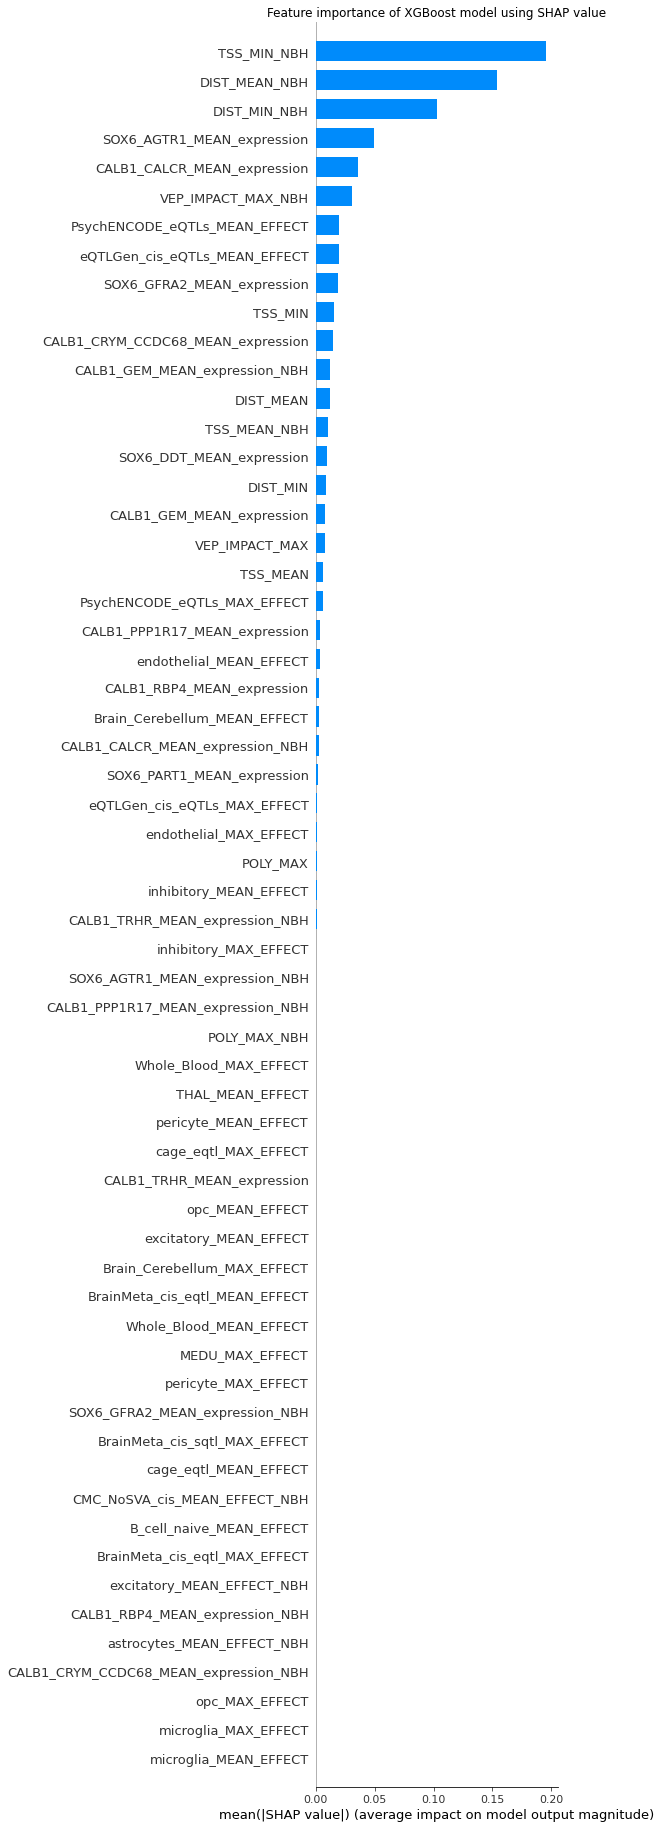

In [16]:
plt.title("Feature importance of XGBoost model using SHAP value")
shap.summary_plot(shap_values, X, plot_type="bar", max_display=60, show = False)
plt.savefig('../manuscript_data/plots/summary_plot_bar_plot.png', dpi = 300, bbox_inches='tight')

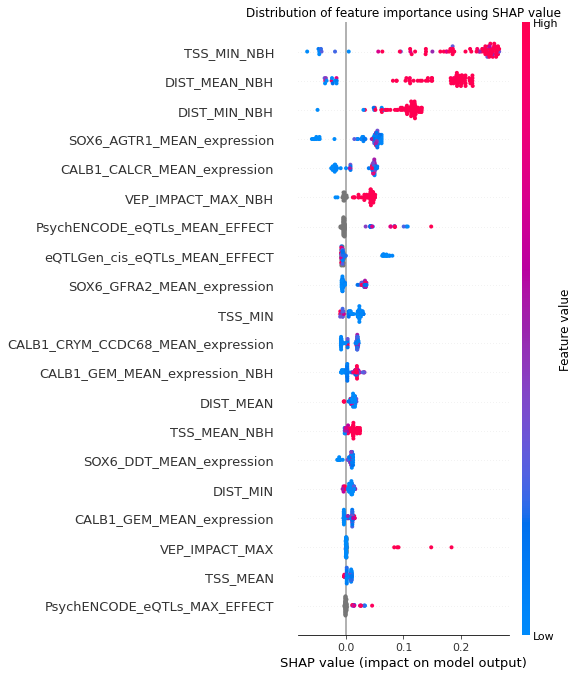

In [17]:
plt.title("Distribution of feature importance using SHAP value")
shap.summary_plot(shap_values, X, show = False)
plt.savefig('../manuscript_data/plots/summary_plot_feature_distribution.png', dpi = 300, bbox_inches='tight')

In [21]:
X_best_genes["symbol"]

0      ASXL3
1       BIN3
2      BRIP1
3     CAB39L
4     CAMK2D
       ...  
73     UBAP2
74     VAMP4
75    VPS13C
76     ZBTB4
77    ZCWPW2
Name: symbol, Length: 78, dtype: object

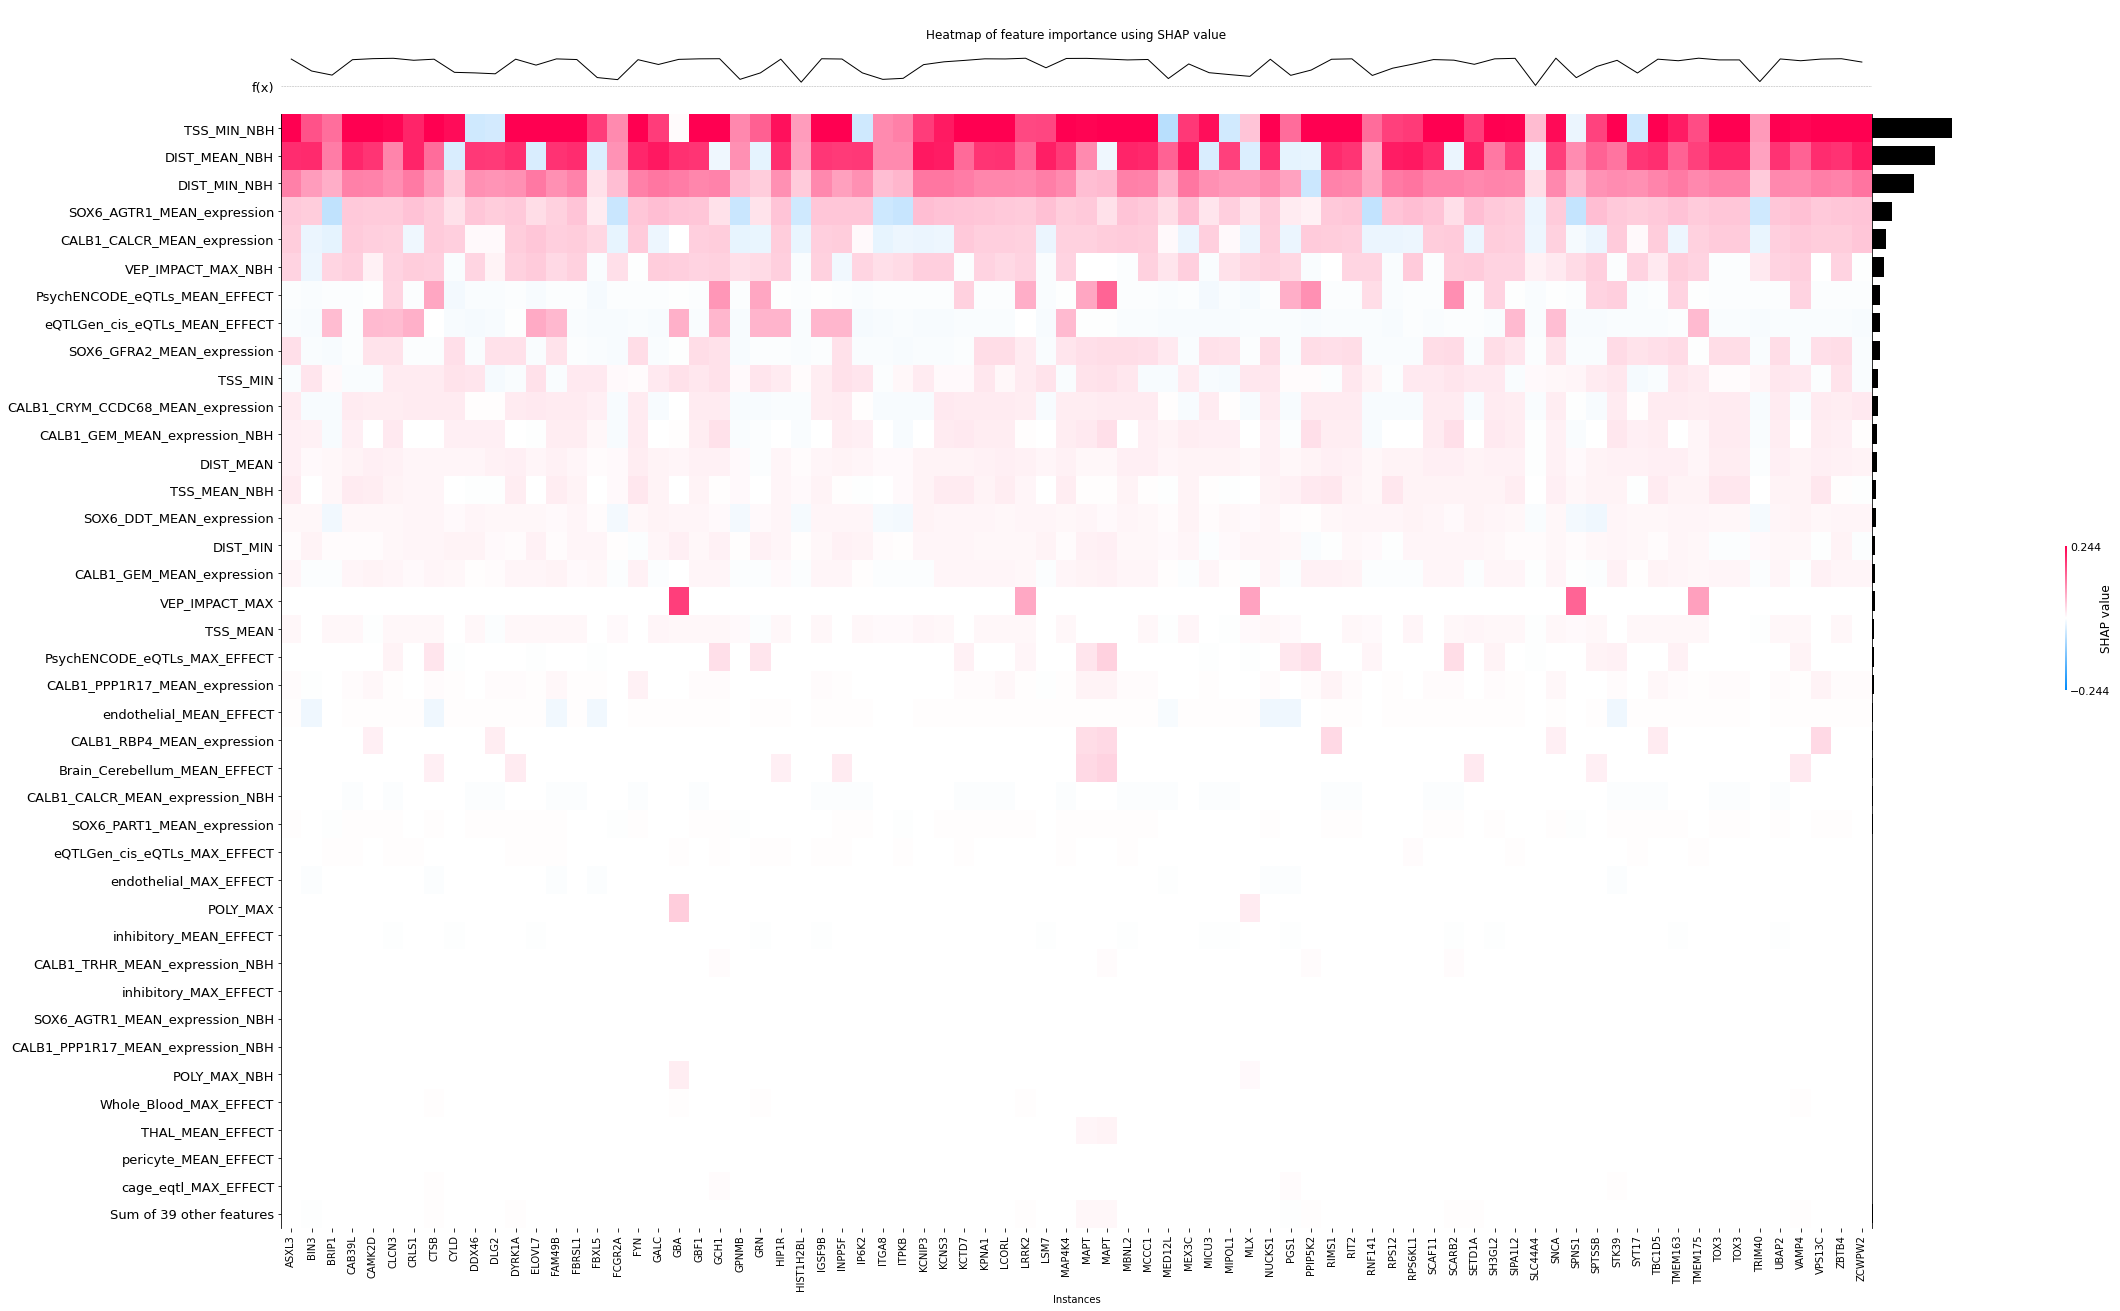

In [23]:
plt.title("Heatmap of feature importance using SHAP value")
shap.plots.heatmap(explainer(X), max_display=40, instance_order=np.arange(78), plot_width=32, show = False)
plt.xticks(range(0, 78), X_best_genes["symbol"], rotation = 90)
plt.savefig('../manuscript_data/plots/heatmap.png', dpi = 300, bbox_inches='tight')

In [19]:
agtr1_expression = X_best_genes.filter(regex='MEAN_expression$')
agtr1_expression.set_index(X_best_genes.iloc[:,0], inplace=True)
agtr1_expression.index.names = ['Gene']

In [22]:
agtr1_expression.transpose()

Gene                                  ASXL3      BIN3     BRIP1    CAB39L  \
CALB1_CALCR_MEAN_expression        4.558290  0.640581  0.183138  3.081888   
CALB1_CRYM_CCDC68_MEAN_expression  4.354458  0.610097  0.175081  2.658432   
CALB1_GEM_MEAN_expression          3.941176  0.766968  0.313348  1.960407   
CALB1_PPP1R17_MEAN_expression      2.843152  0.407216  0.158321  1.439617   
CALB1_RBP4_MEAN_expression         3.425950  0.465269  0.149410  2.241153   
CALB1_TRHR_MEAN_expression         6.837449  0.584362  0.253086  1.744856   
SOX6_AGTR1_MEAN_expression         6.425865  0.662627  0.133796  3.940457   
SOX6_DDT_MEAN_expression           3.792046  0.482187  0.076222  3.093206   
SOX6_GFRA2_MEAN_expression         5.352423  0.563877  0.138452  1.875393   
SOX6_PART1_MEAN_expression         5.549887  0.544974  0.115268  3.058957   

Gene                                  CAMK2D     CLCN3     CRLS1      CTSB  \
CALB1_CALCR_MEAN_expression        14.809197  5.751916  0.867285  1.655103   
CALB1_CRYM_CCDC68_MEAN_expression  12.740064  5.216971  1.002148  1.930183   
CALB1_GEM_MEAN_expression          14.680995  6.116516  1.078054  1.799774   
CALB1_PPP1R17_MEAN_expression       7.641384  3.276878  0.586892  1.345361   
CALB1_RBP4_MEAN_expression          9.436435  7.044561  0.854522  3.437746   
CALB1_TRHR_MEAN_expression         12.269547  4.216049  0.755144  2.024691   
SOX6_AGTR1_MEAN_expression         20.720993  5.988468  0.749000  1.337138   
SOX6_DDT_MEAN_expression           13.310688  6.735708  0.570008  2.480944   
SOX6_GFRA2_MEAN_expression         13.267464  4.429201  0.821901  1.712398   
SOX6_PART1_MEAN_expression         14.187831  4.837491  0.804989  1.613757   

Gene                                   CYLD     DDX46  ...   TMEM163  \
CALB1_CALCR_MEAN_expression        3.138766  2.085115  ...  0.628479   
CALB1_CRYM_CCDC68_MEAN_expression  2.488722  1.824919  ...  1.477981   
CALB1_GEM_MEAN_expression          2.823529  2.292986  ...  2.218326   
CALB1_PPP1R17_MEAN_expression      1.904271  1.230486  ...  1.742268   
CALB1_RBP4_MEAN_expression         3.609436  2.148100  ...  1.566186   
CALB1_TRHR_MEAN_expression         2.415638  2.090535  ...  3.082305   
SOX6_AGTR1_MEAN_expression         2.932455  1.695928  ...  1.732055   
SOX6_DDT_MEAN_expression           3.297017  1.744408  ...  0.934548   
SOX6_GFRA2_MEAN_expression         2.510384  1.831970  ...  2.185022   
SOX6_PART1_MEAN_expression         2.635676  1.659108  ...  1.679138   

Gene                                TMEM175       TOX3       TOX3    TRIM40  \
CALB1_CALCR_MEAN_expression        1.219040  13.562727  13.562727  0.002420   
CALB1_CRYM_CCDC68_MEAN_expression  1.161117   6.552095   6.552095  0.001074   
CALB1_GEM_MEAN_expression          1.199095   4.333710   4.333710  0.000000   
CALB1_PPP1R17_MEAN_expression      0.821060   3.999264   3.999264  0.001473   
CALB1_RBP4_MEAN_expression         1.347313   5.777195   5.777195  0.000000   
CALB1_TRHR_MEAN_expression         1.076132  12.713992  12.713992  0.000000   
SOX6_AGTR1_MEAN_expression         1.220522   7.367145   7.367145  0.001647   
SOX6_DDT_MEAN_expression           1.285833   6.071251   6.071251  0.000829   
SOX6_GFRA2_MEAN_expression         1.122089   9.218376   9.218376  0.003147   
SOX6_PART1_MEAN_expression         1.216175   5.493197   5.493197  0.001512   

Gene                                  UBAP2     VAMP4     VPS13C     ZBTB4  \
CALB1_CALCR_MEAN_expression        3.363050  0.985881   9.162969  3.680516   
CALB1_CRYM_CCDC68_MEAN_expression  3.255639  0.809882   7.229860  3.210526   
CALB1_GEM_MEAN_expression          3.516968  0.891403  10.372172  3.959276   
CALB1_PPP1R17_MEAN_expression      1.895434  0.609720   5.181885  2.225331   
CALB1_RBP4_MEAN_expression         2.448231  1.237221   7.731324  2.926606   
CALB1_TRHR_MEAN_expression         2.586420  0.849794   7.061728  3.662551   
SOX6_AGTR1_MEAN_expression         3.551542  0.756531   7.107202  3.165568   
SOX6_D

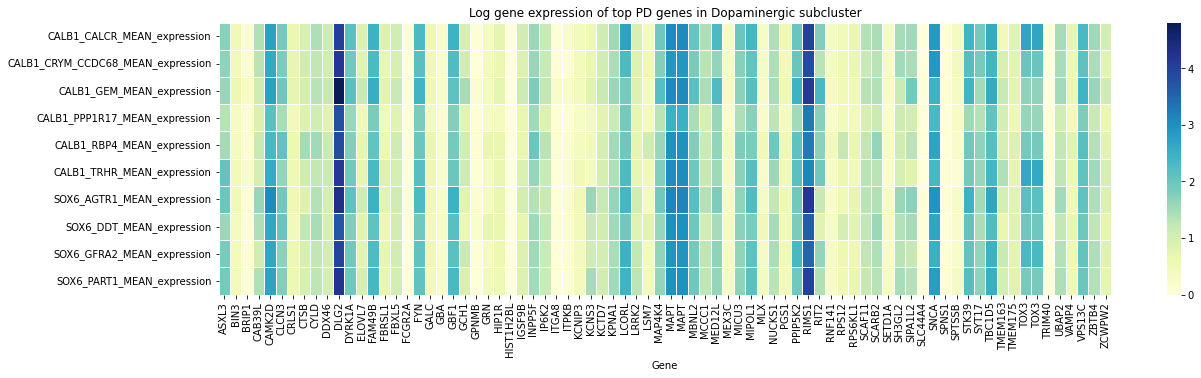

In [29]:
plt.figure(figsize=(20,5))
plt.title("Log gene expression of top PD genes in Dopaminergic subcluster")
ax = sns.heatmap(np.log(agtr1_expression+1).transpose(), linewidth=0.5, cmap="YlGnBu")
plt.savefig('../manuscript_data/plots/expression_in_atgr1_cluster.png', dpi = 300, bbox_inches='tight')
plt.show()

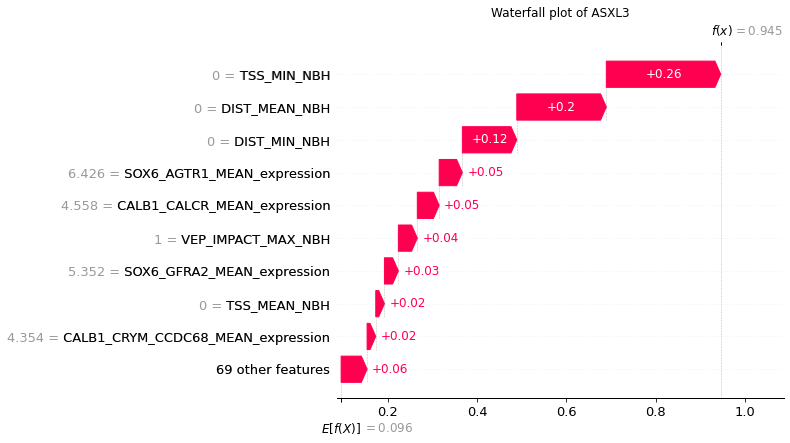

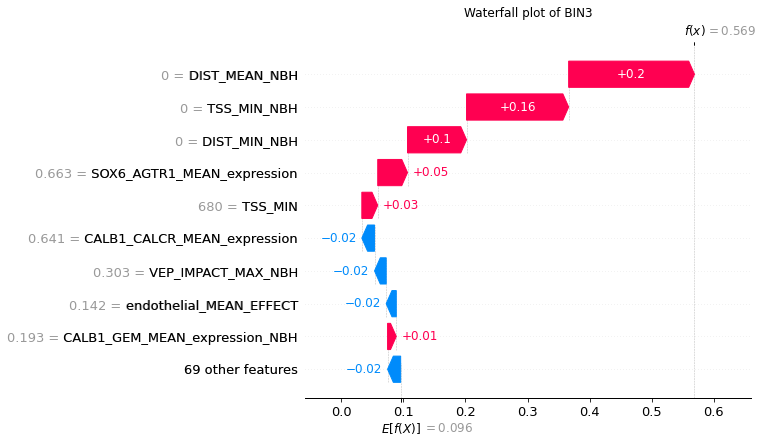

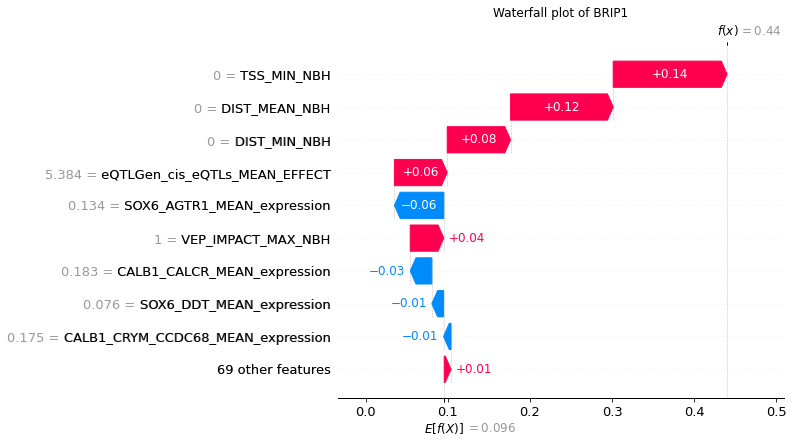

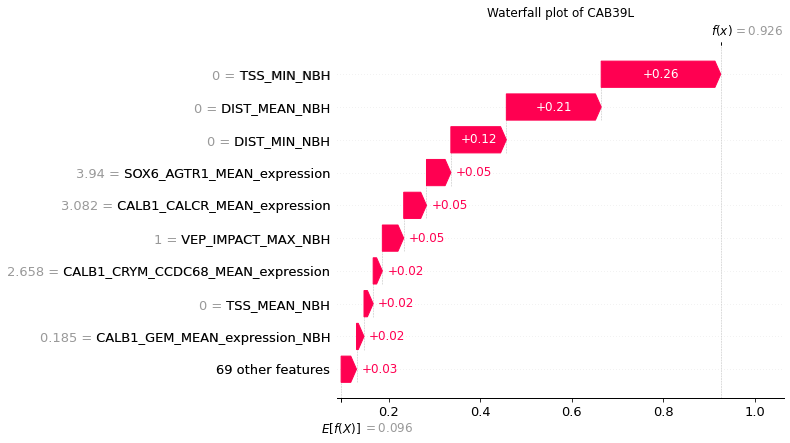

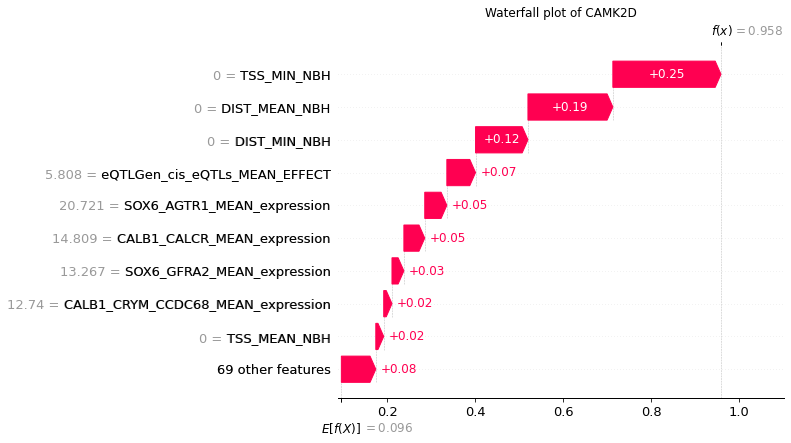

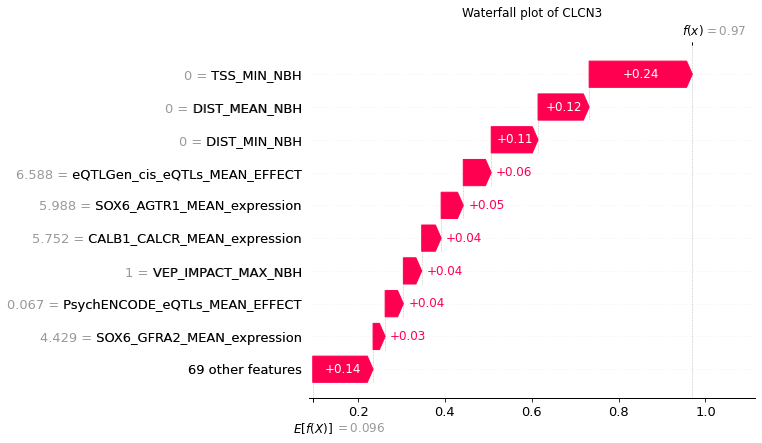

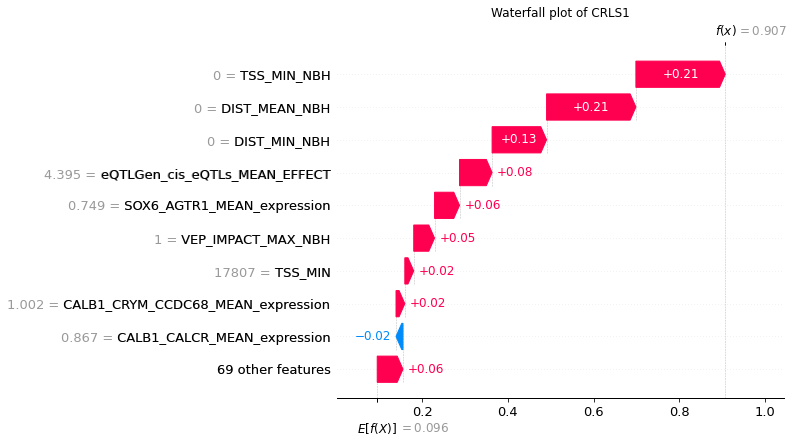

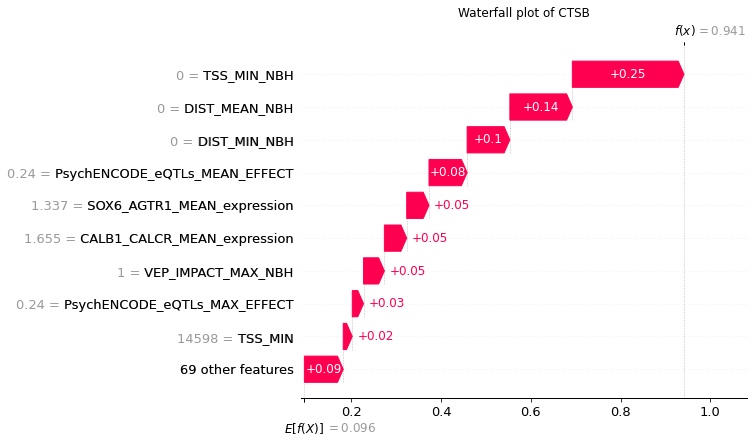

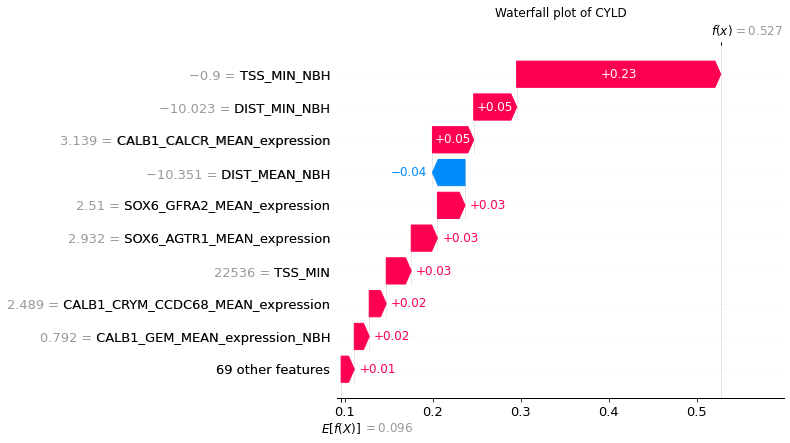

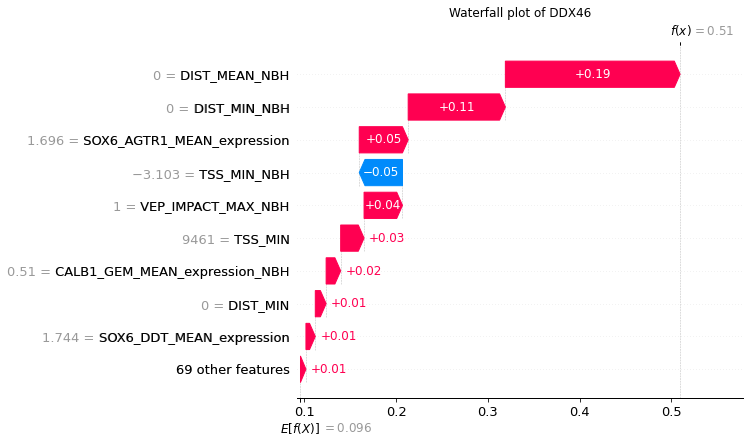

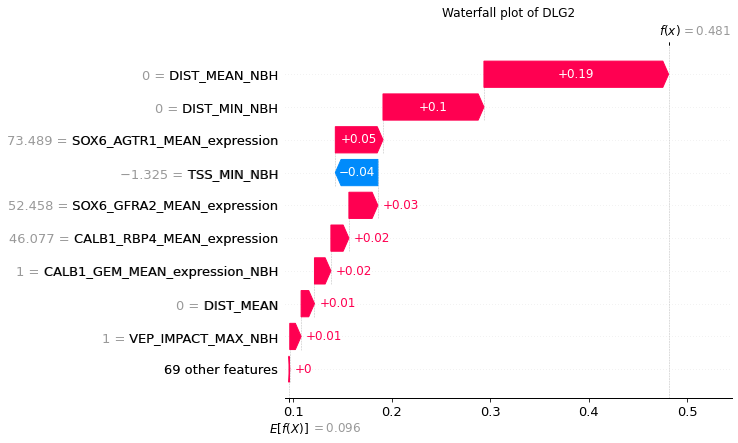

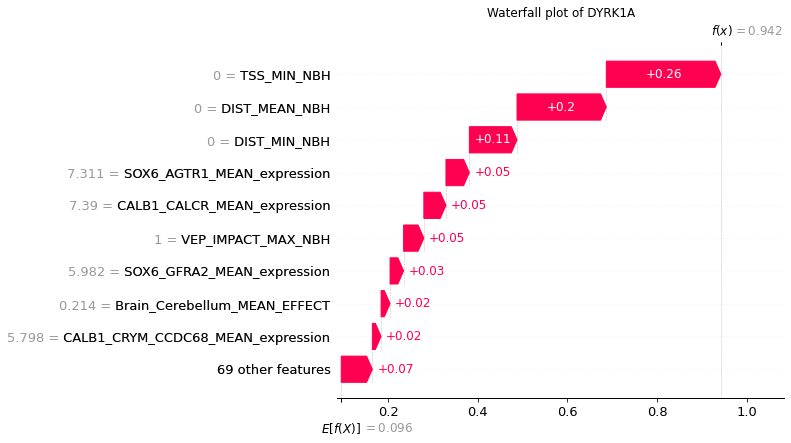

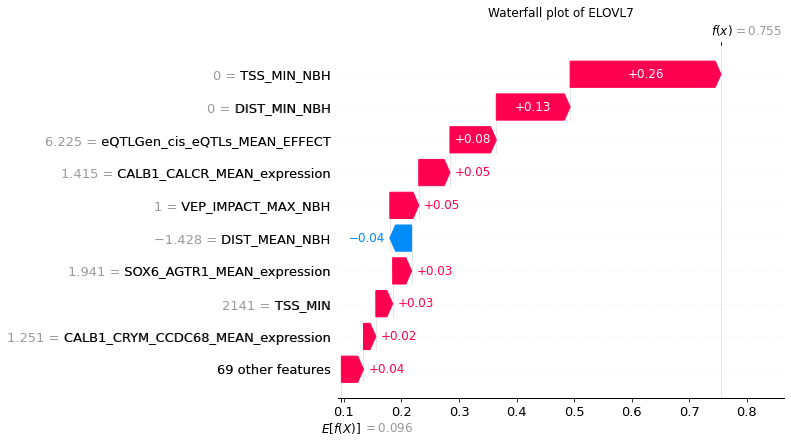

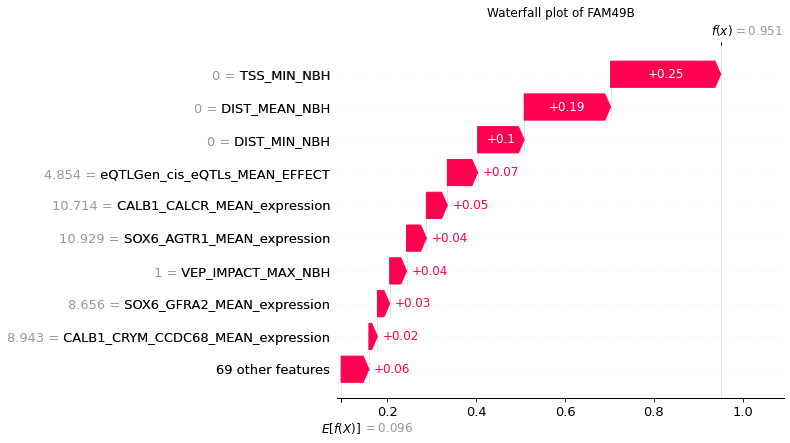

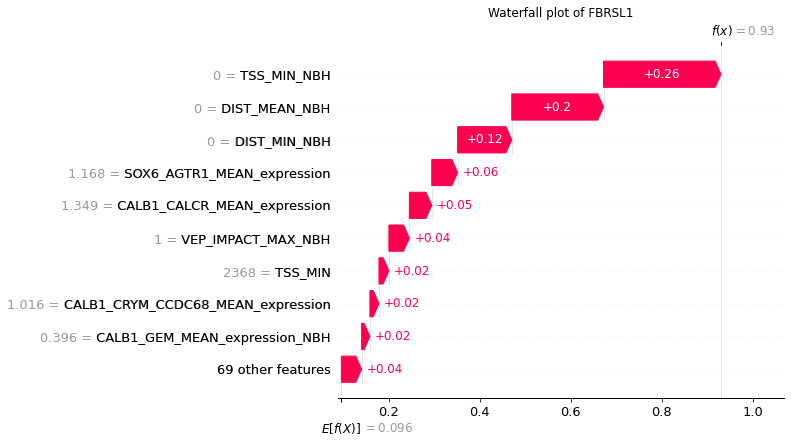

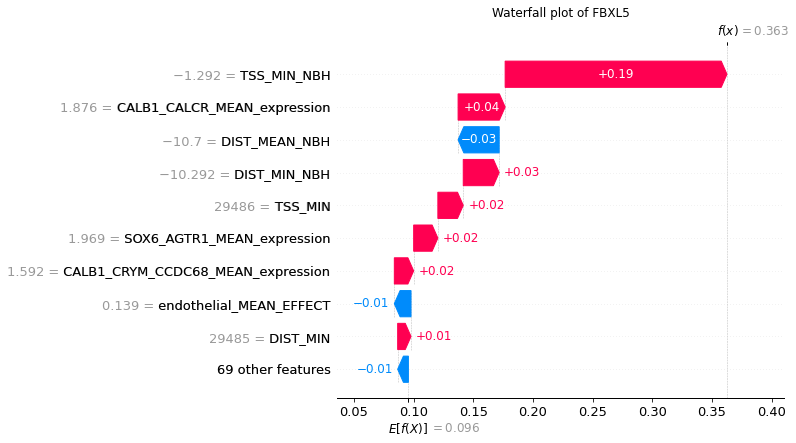

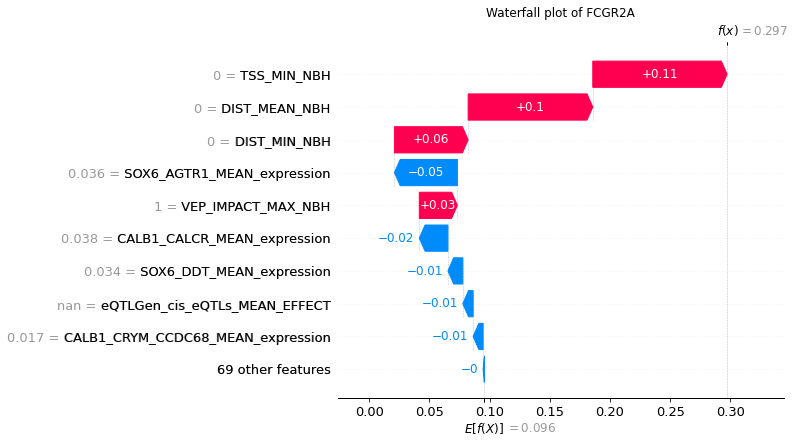

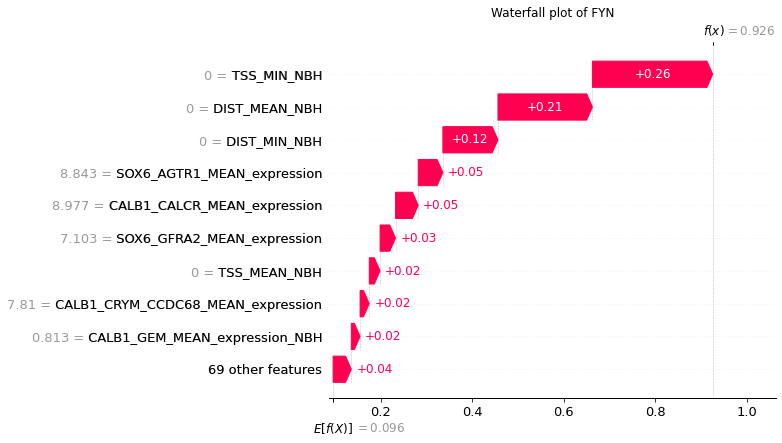

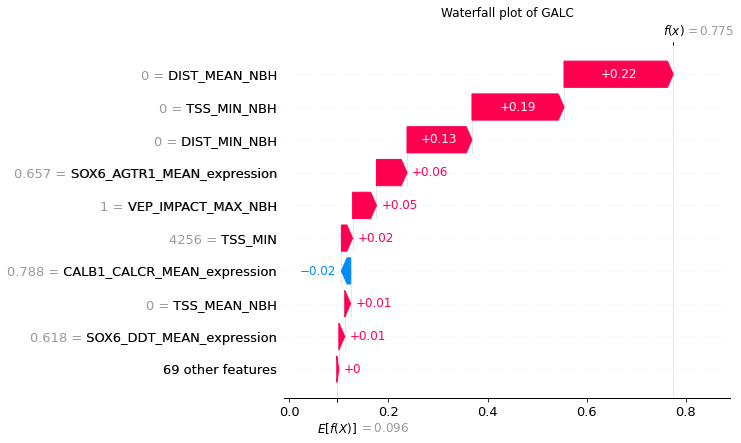

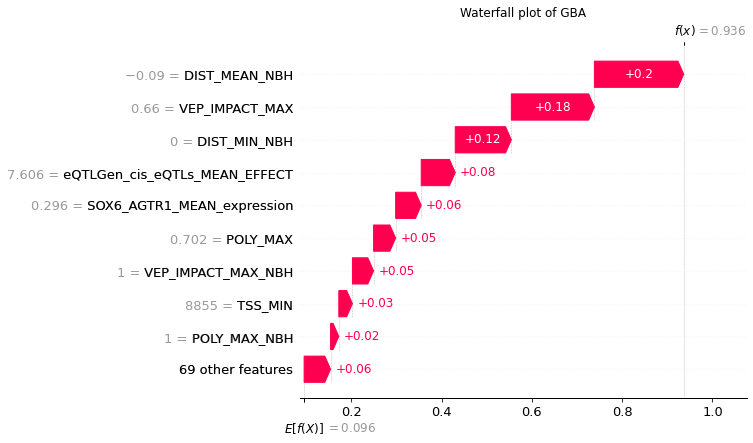

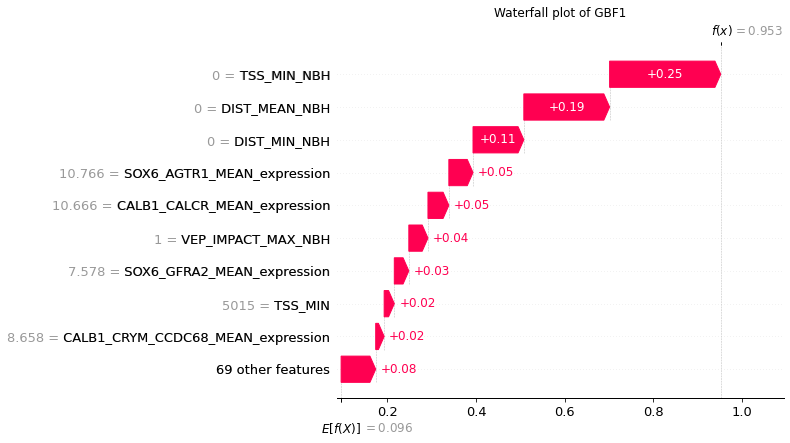

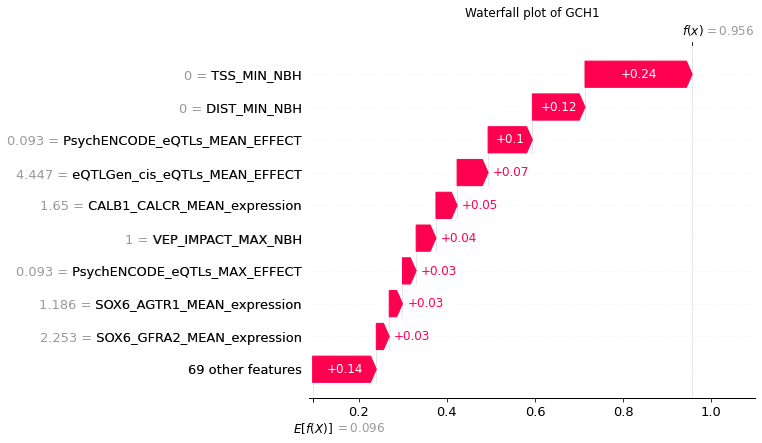

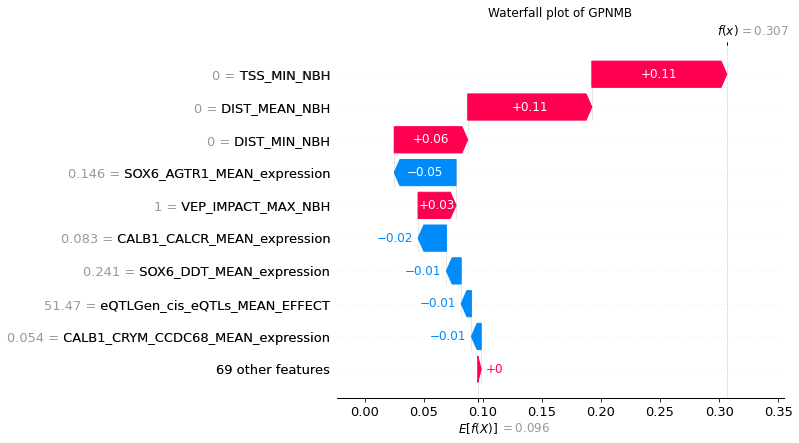

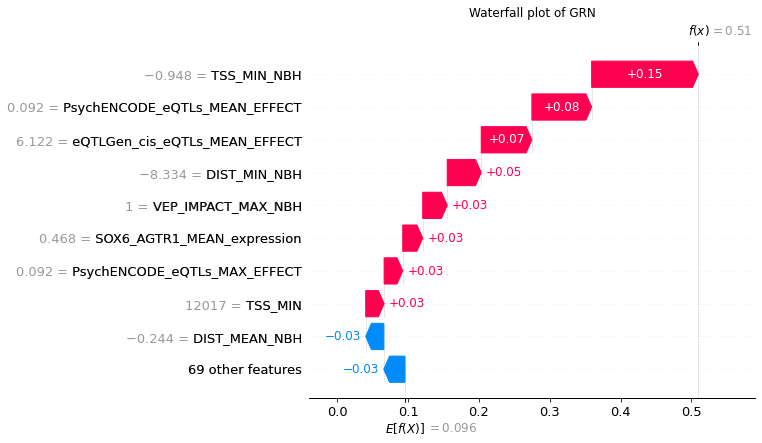

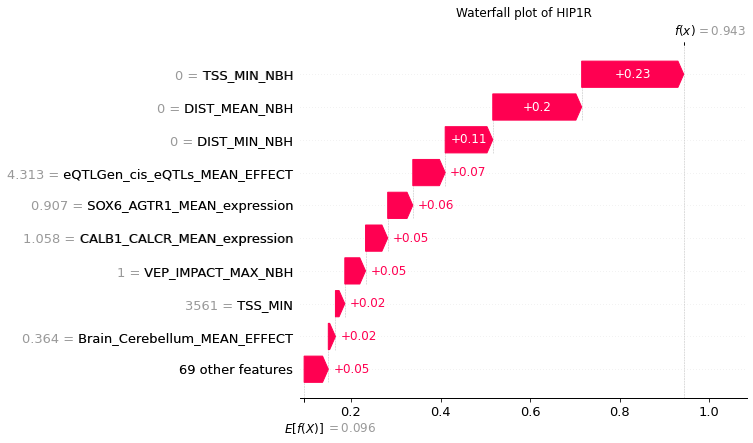

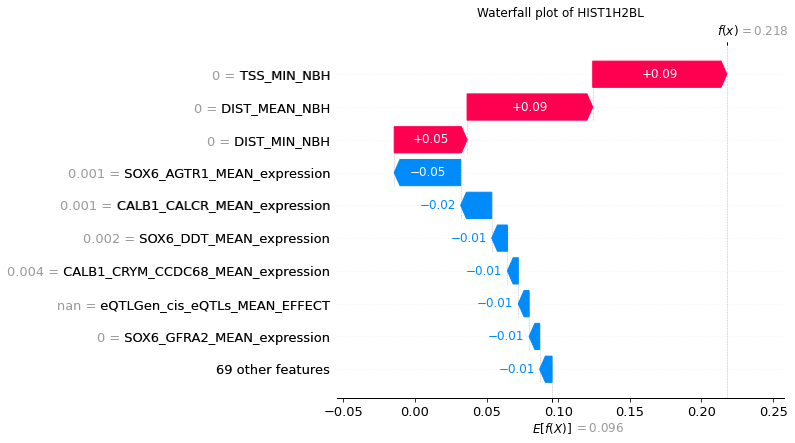

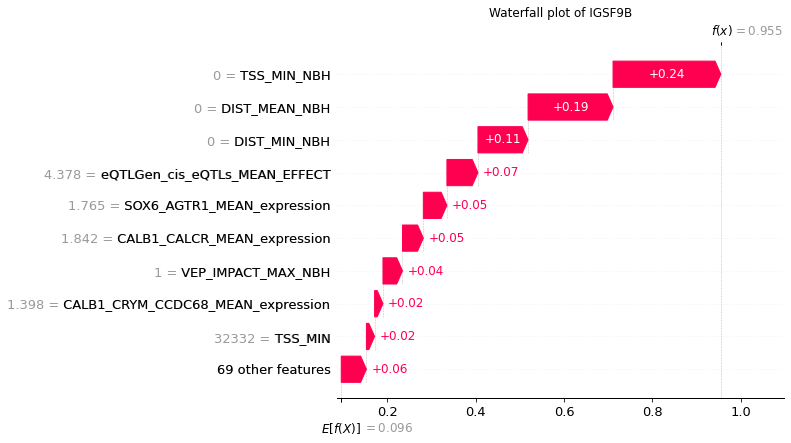

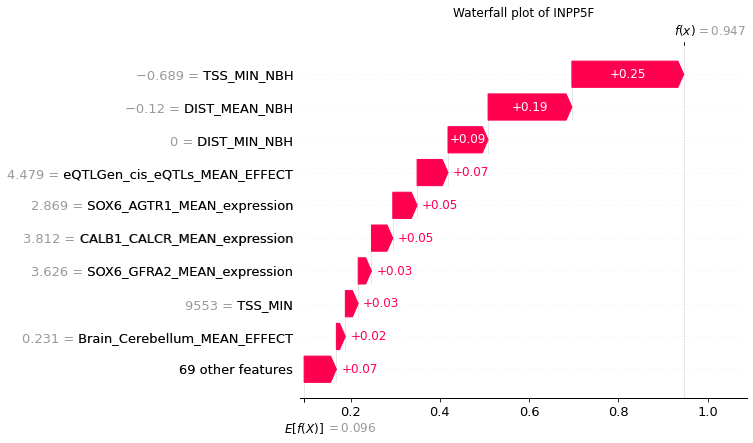

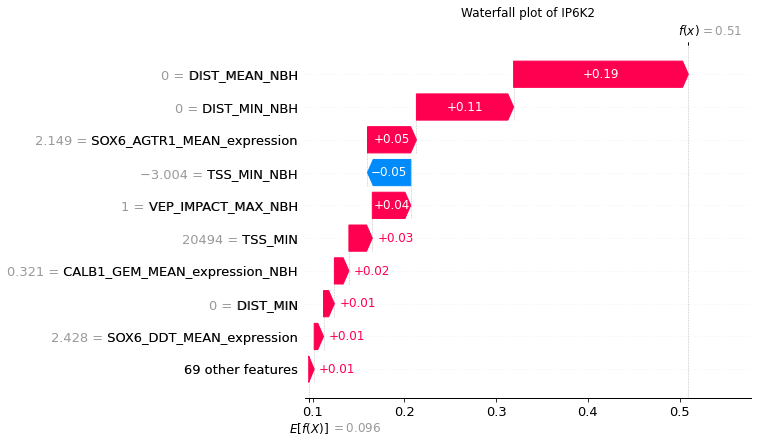

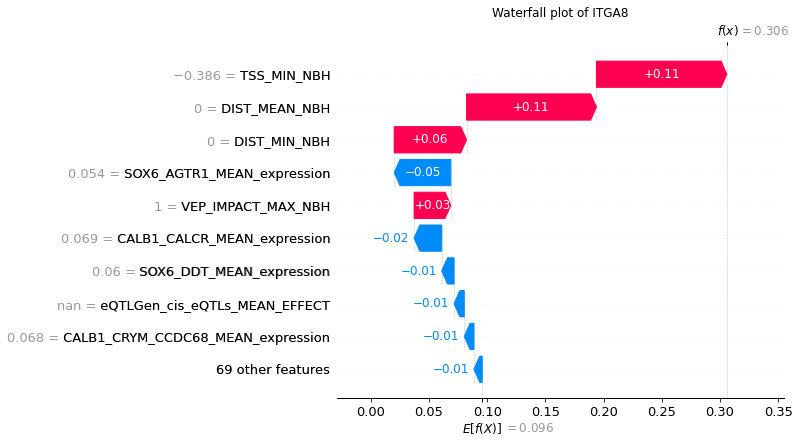

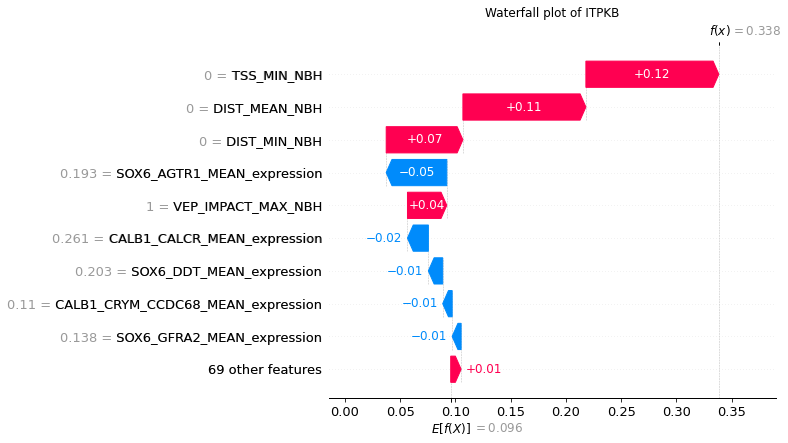

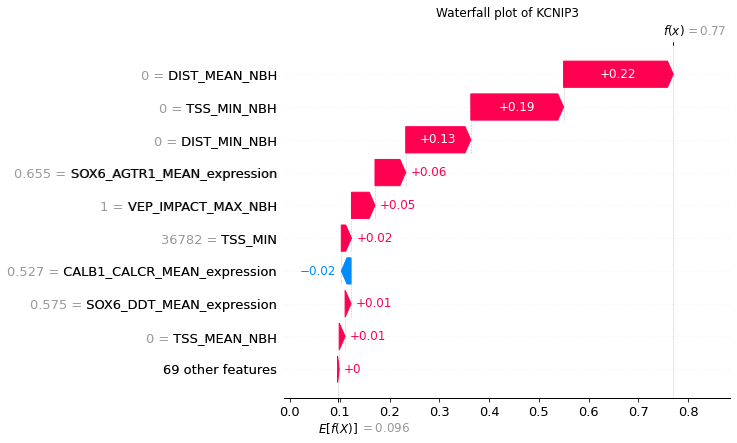

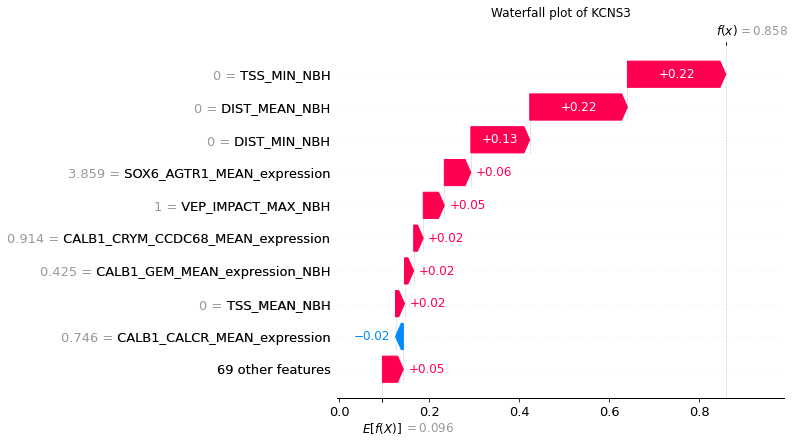

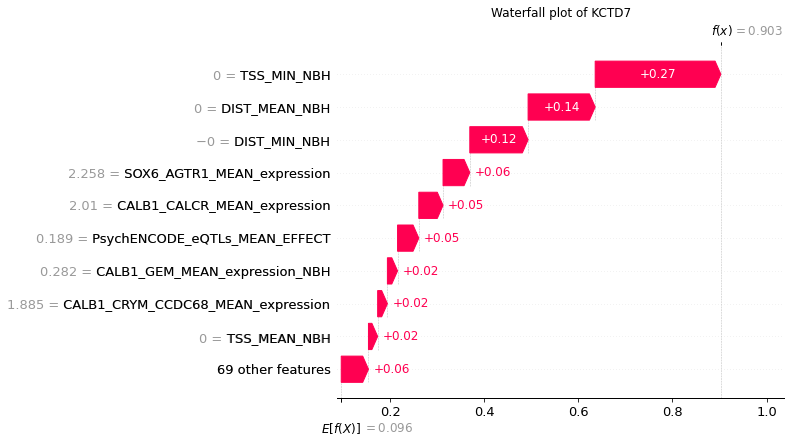

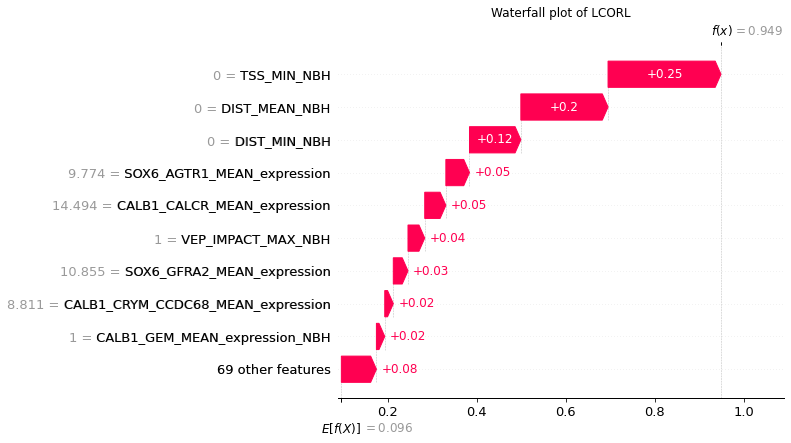

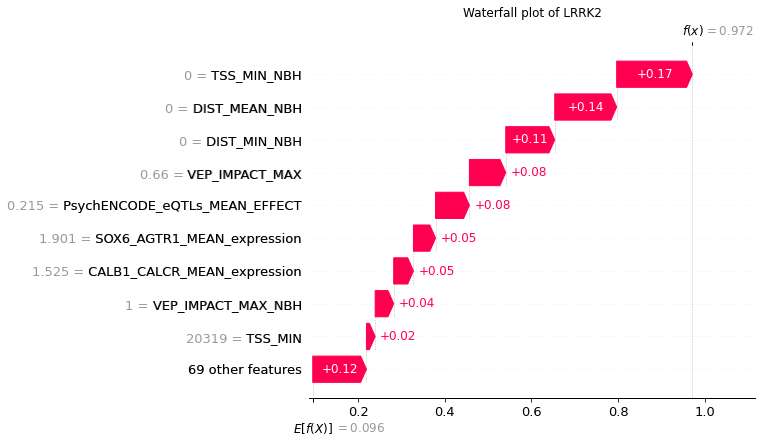

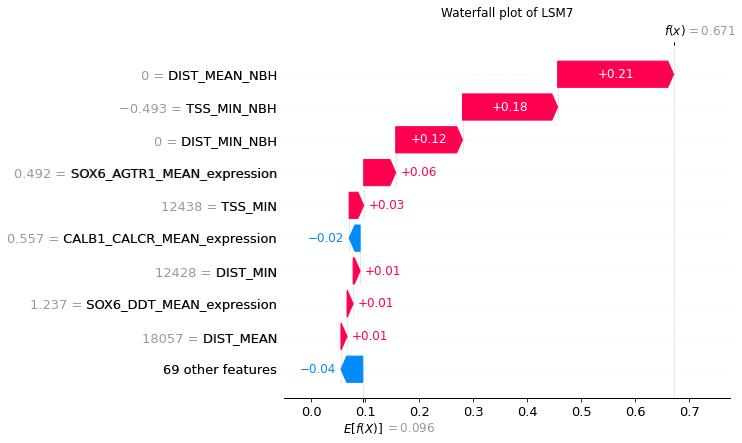

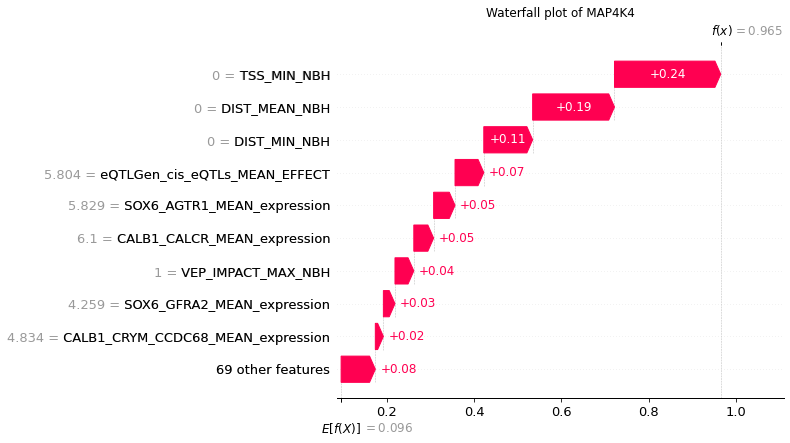

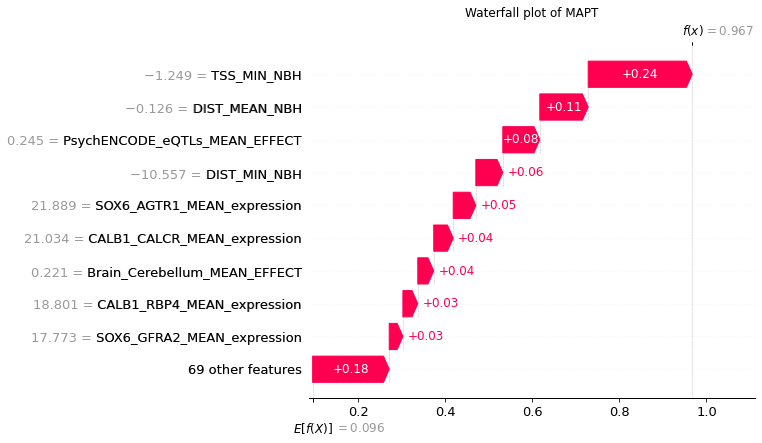

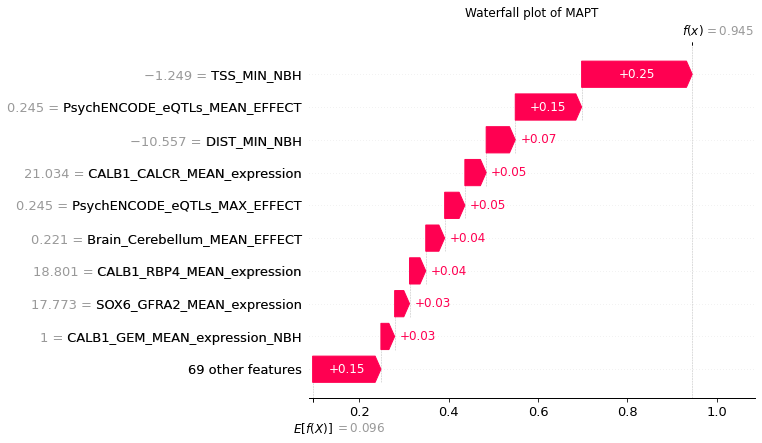

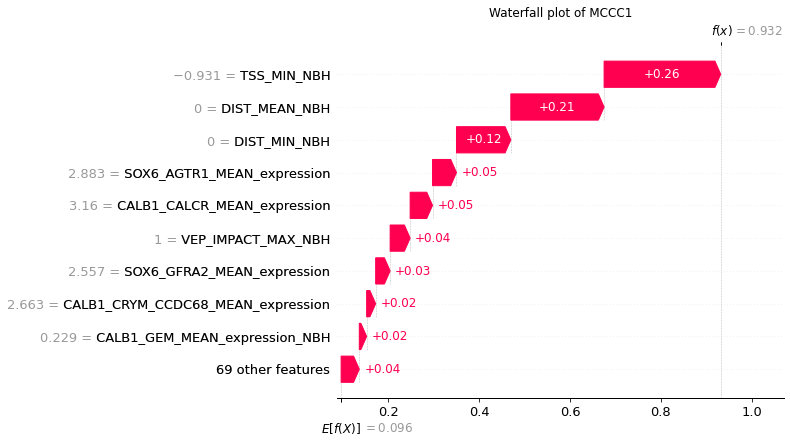

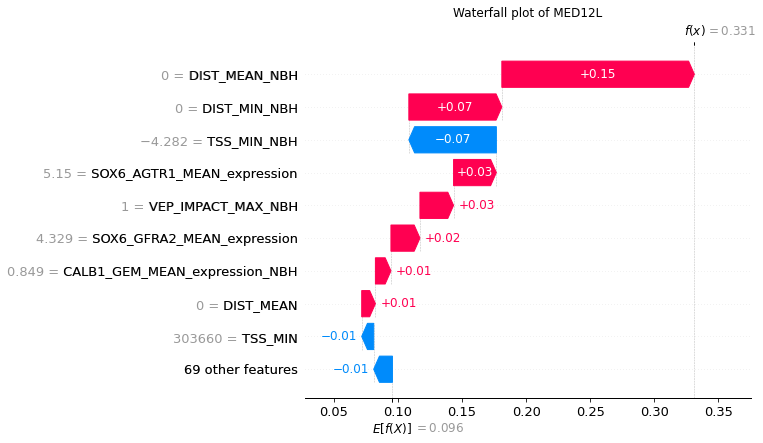

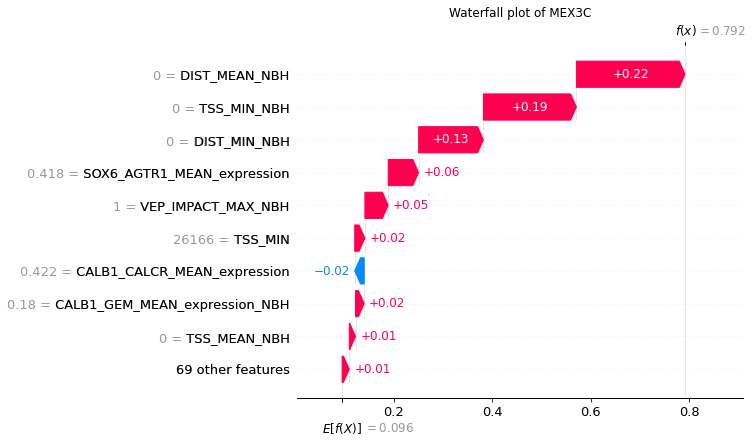

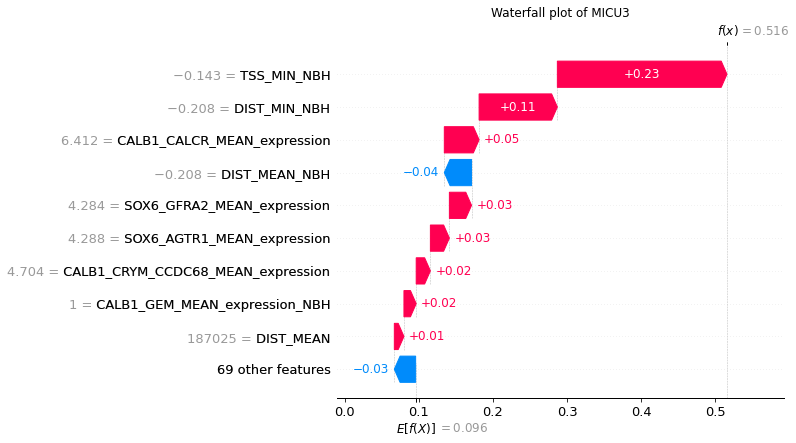

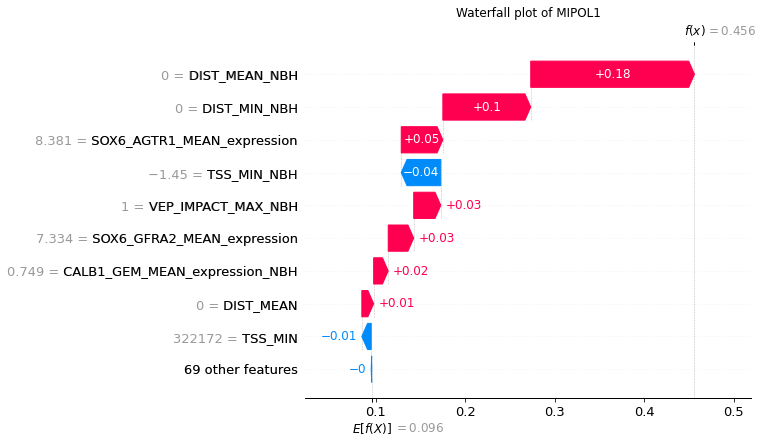

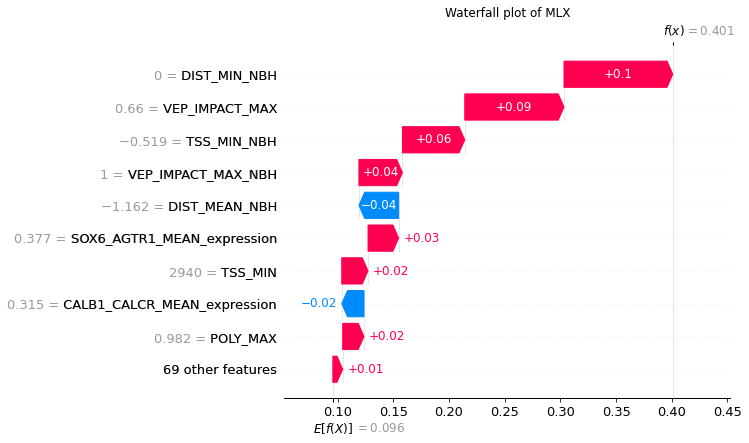

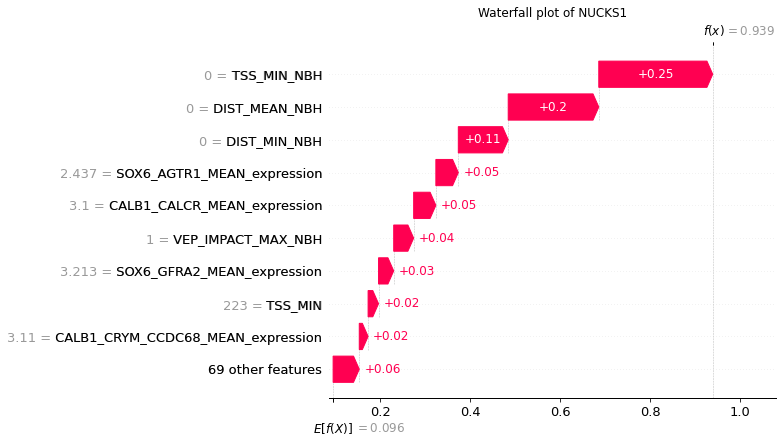

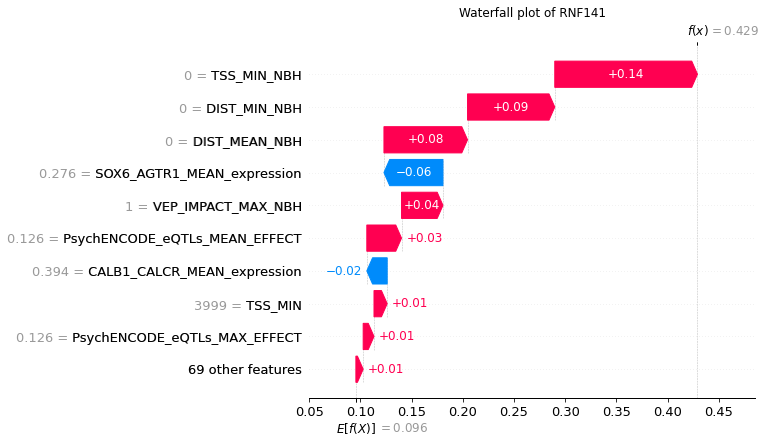

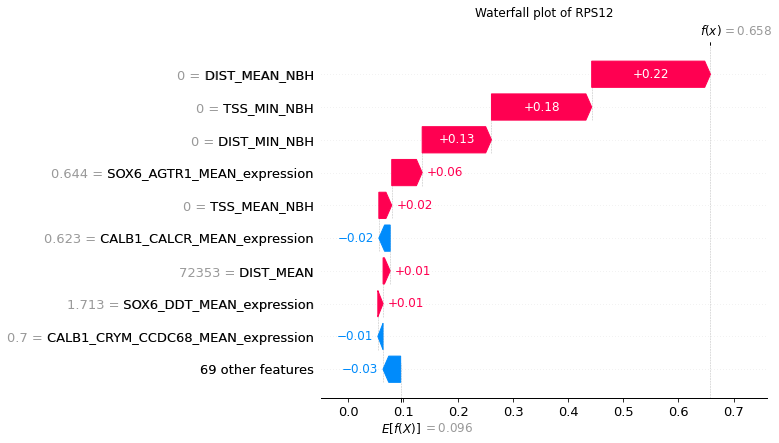

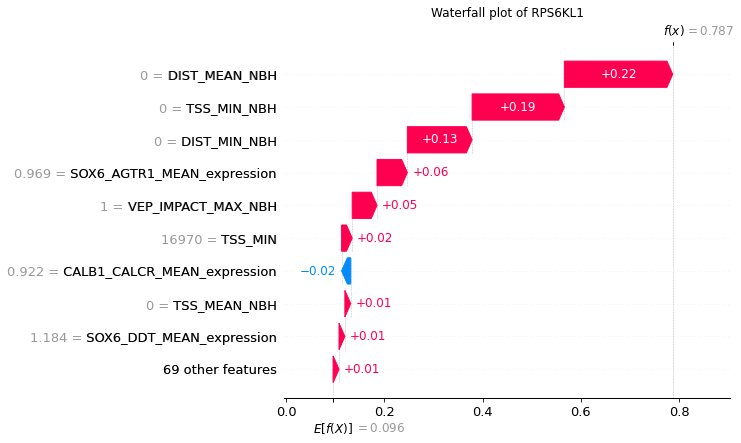

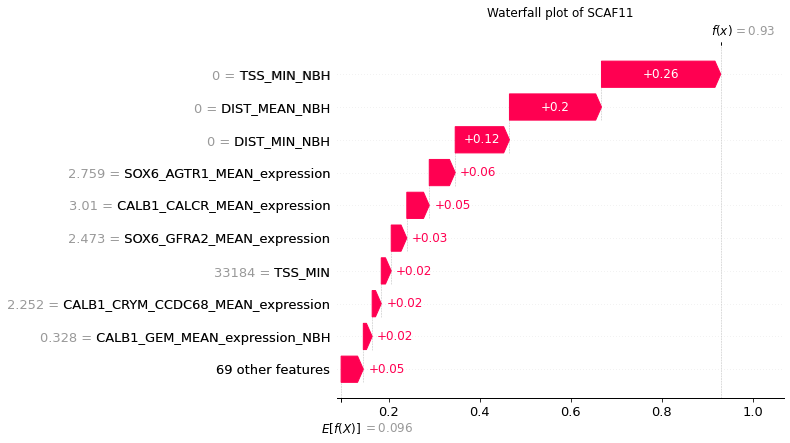

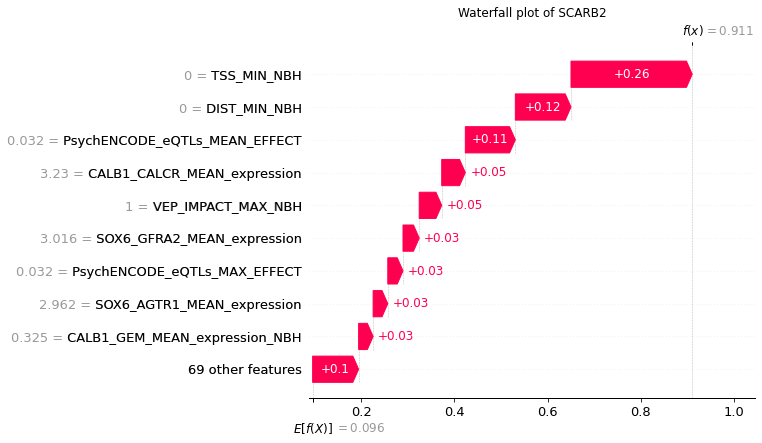

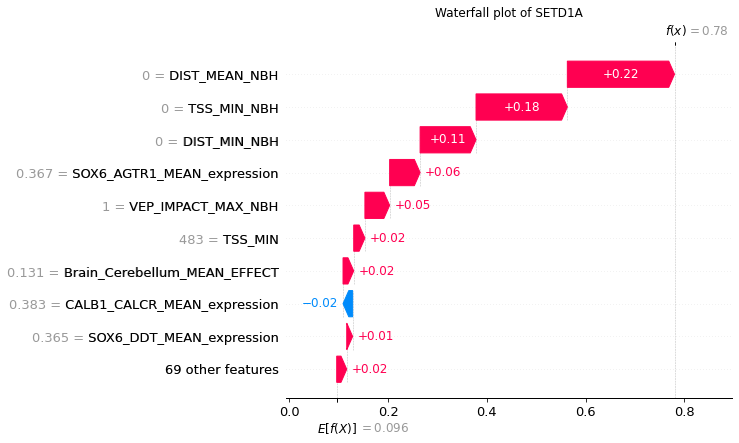

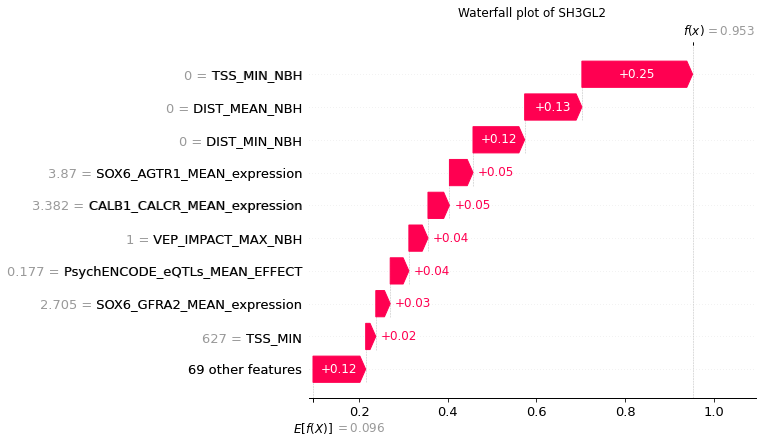

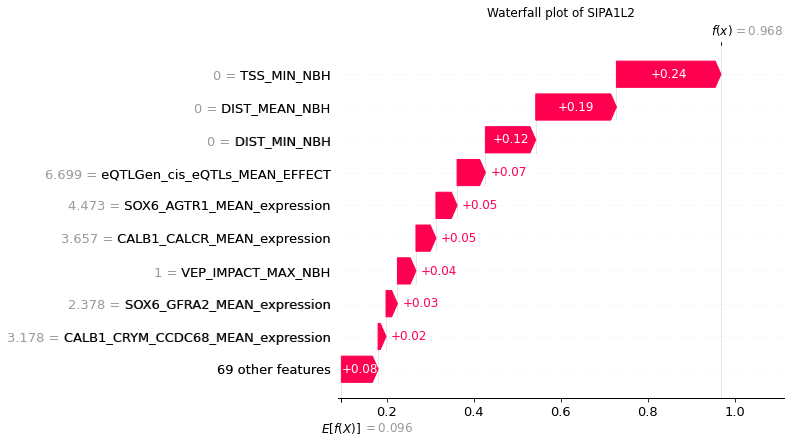

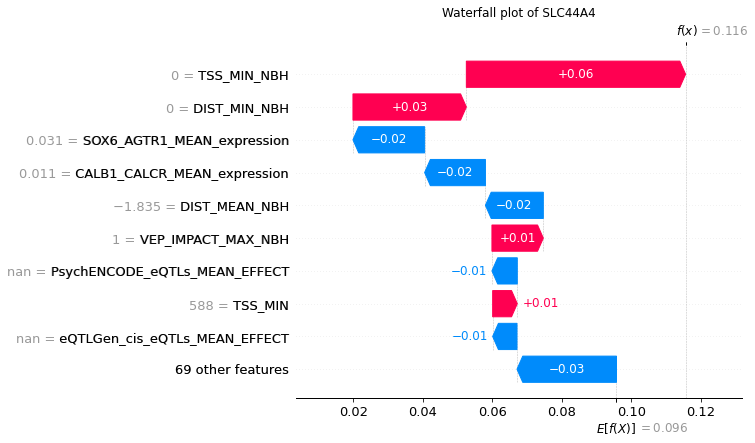

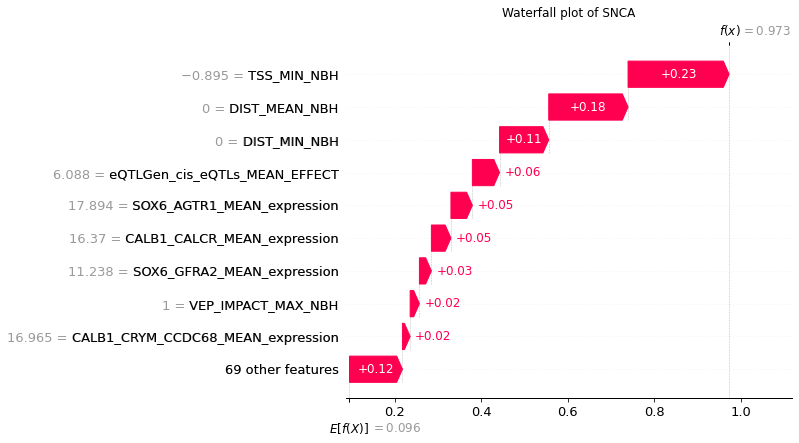

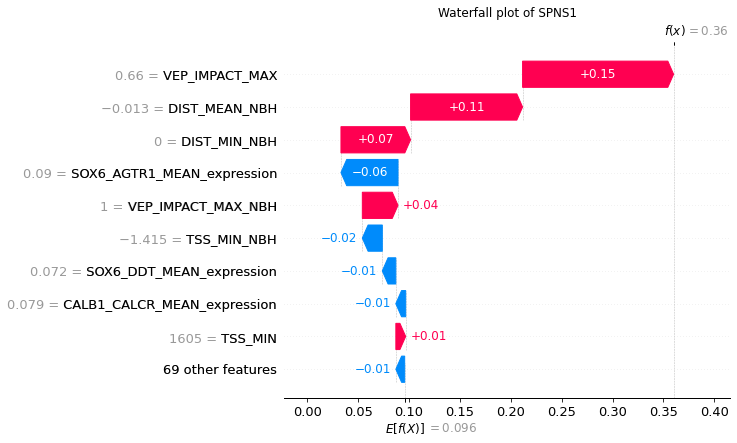

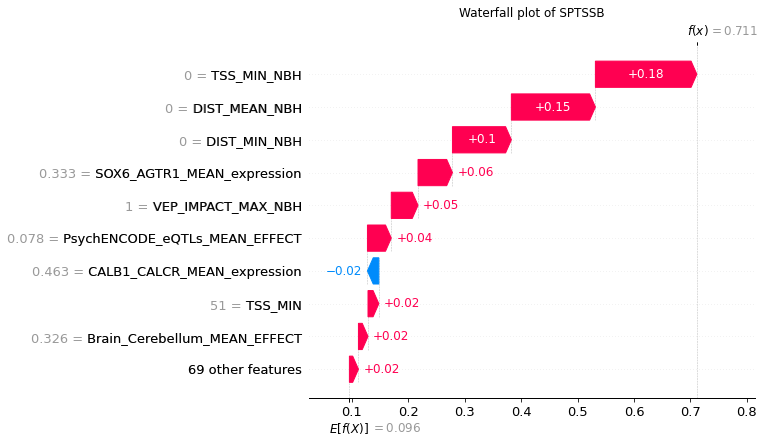

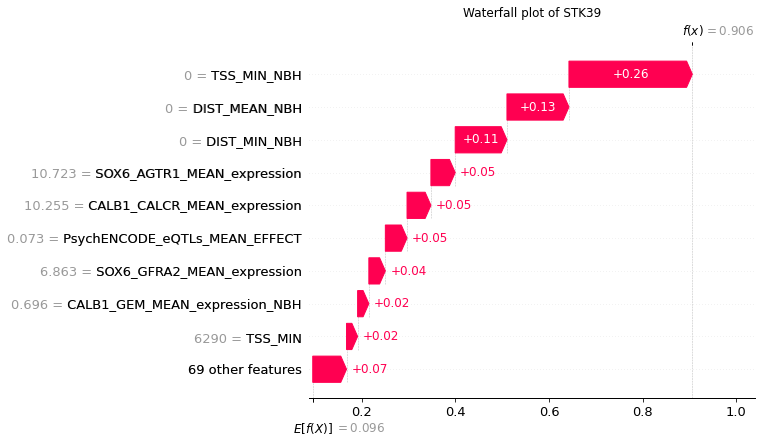

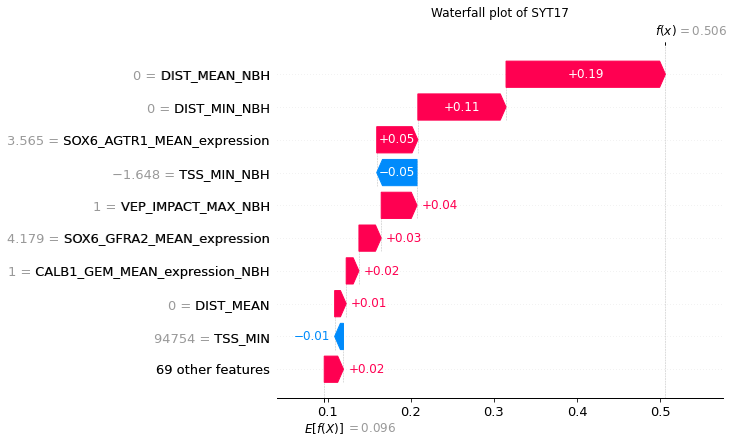

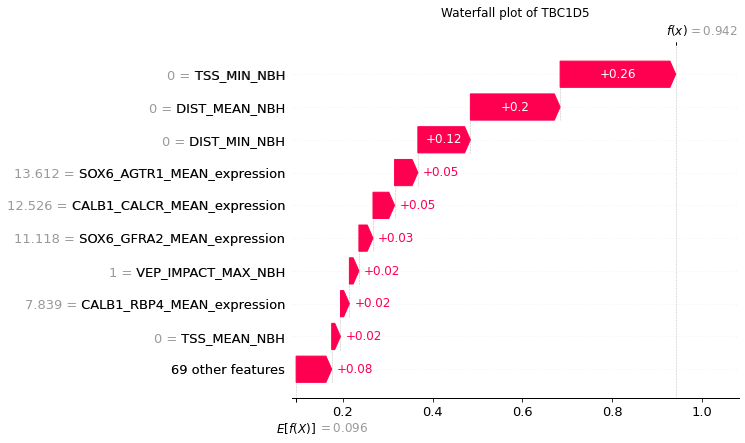

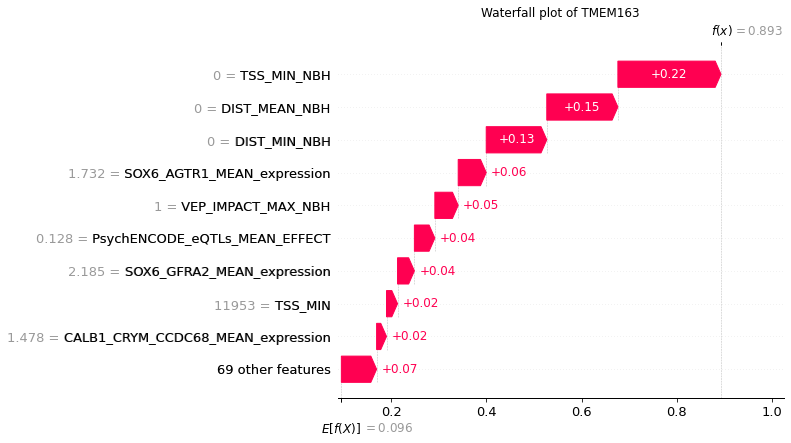

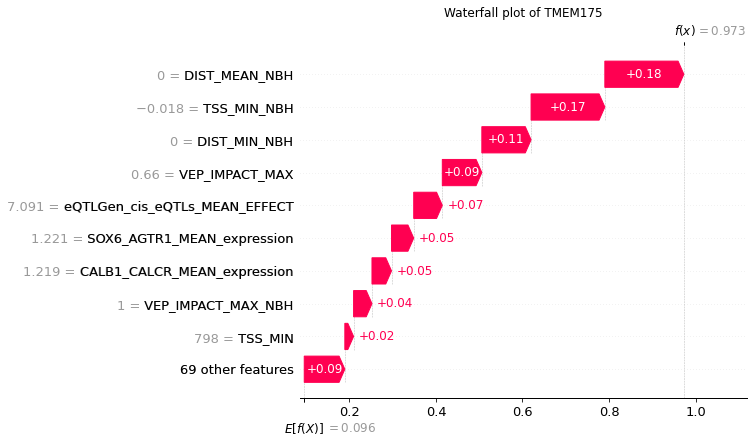

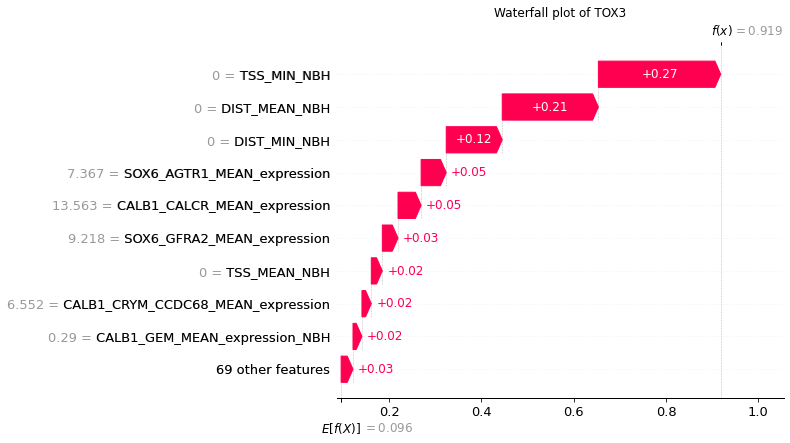

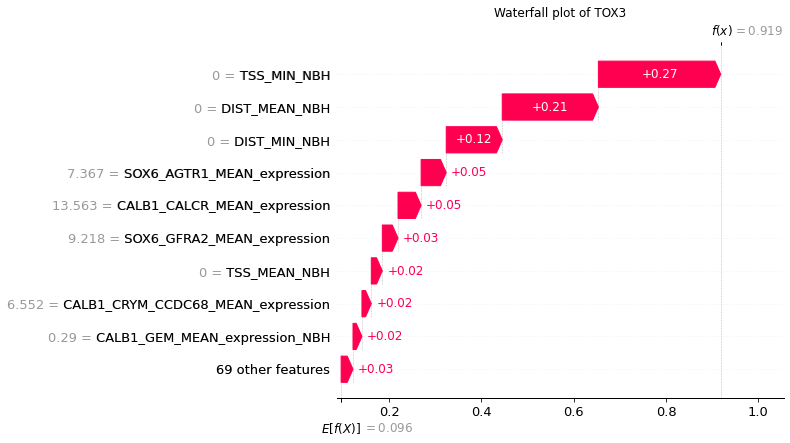

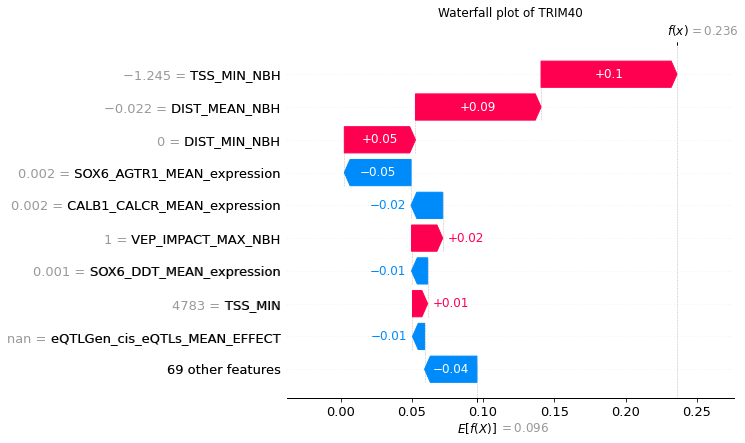

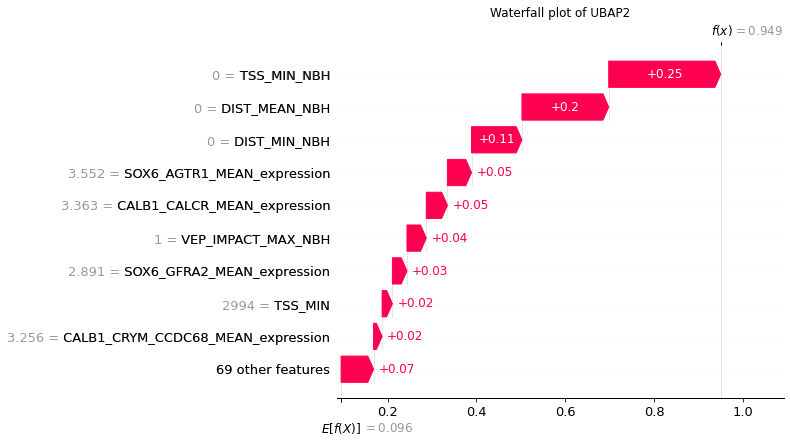

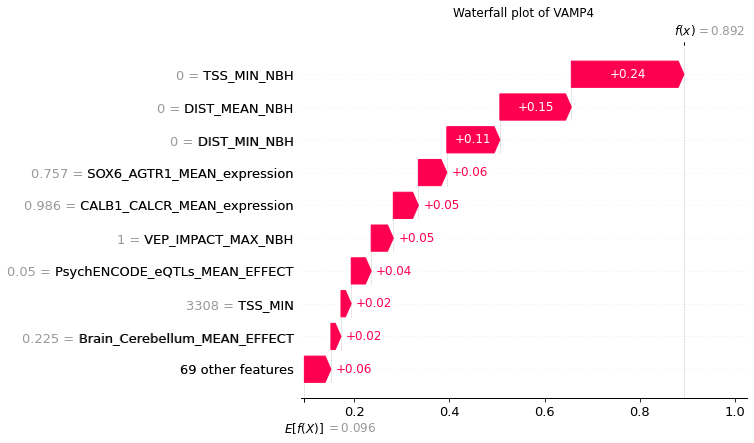

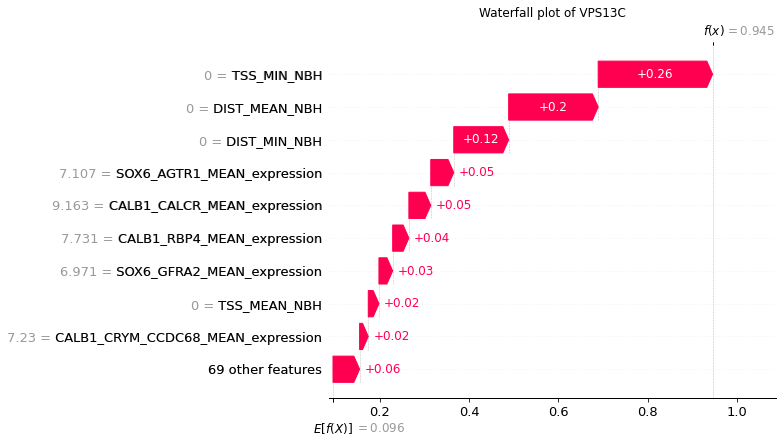

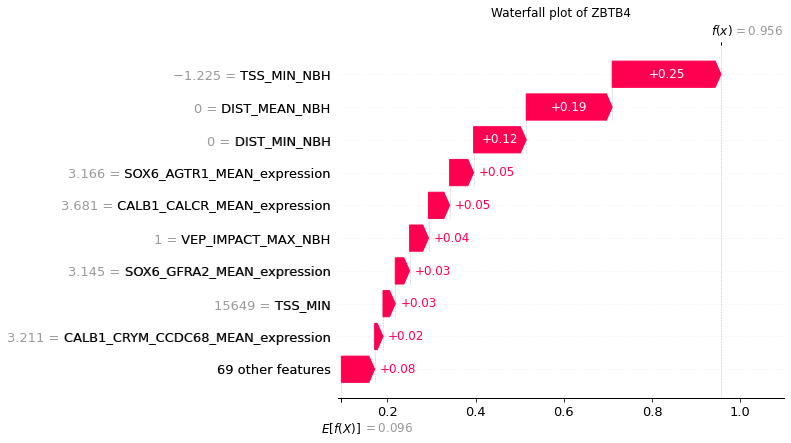

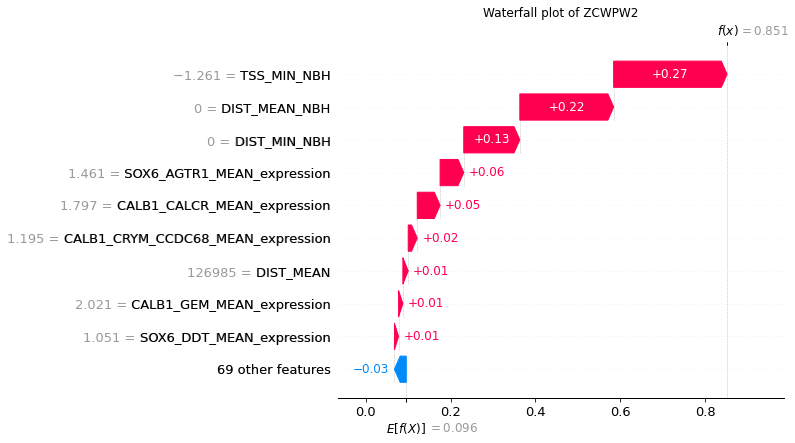

In [19]:
for n in range(78):
  plt.title('Waterfall plot of '+X_best_genes.loc[n,"symbol"])
  ex = shap.Explanation(shap_values[n], 
                      explainer.expected_value,
                      X.iloc[n],  
                      explainer(X).feature_names)
  shap.plots.waterfall(ex, show = False)
  plt.savefig('../manuscript_data/plots/'+X_best_genes.loc[n,"symbol"]+'_waterfall_plot.png', dpi = 300, bbox_inches='tight')
  plt.show()